In [1]:
# load packages
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorboard as tb
tf.__version__

'1.10.0'

# Prepare Data

In [2]:
# load data
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
# normlize the data
train_x = train_x.astype("float32") / 255.0
test_x = test_x.astype("float32") / 255.0

In [4]:
# one-hot encode the labels
train_y = tf.keras.utils.to_categorical(train_y, 10)
test_y = tf.keras.utils.to_categorical(test_y, 10)

In [5]:
train_y[0], test_y[0]

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32))

In [6]:
# reshape input image to 1-channel images form 3-channel images
w, h = 28, 28
train_x = train_x.reshape(train_x.shape[0], w*h)
test_x = test_x.reshape(test_x.shape[0], w*h)

In [7]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((60000, 784), (60000, 10), (10000, 784), (10000, 10))

In [8]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [9]:
# normlize the data
train_x = train_x.astype("float32") / 255.0
test_x = test_x.astype("float32") / 255.0

In [10]:
# one-hot encode the labels
train_y = tf.keras.utils.to_categorical(train_y, 10)
test_y = tf.keras.utils.to_categorical(test_y, 10)

In [11]:
train_y[0], test_y[0]

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32))

In [12]:
# reshape input image to 1-channel images form 3-channel images
w, h = 28, 28
train_x = train_x.reshape(train_x.shape[0], w*h)
test_x = test_x.reshape(test_x.shape[0], w*h)

In [13]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((60000, 784), (60000, 10), (10000, 784), (10000, 10))

# Model

In [14]:
num_features = train_x.shape[1]
num_classes = train_y.shape[1]
num_features, num_classes

(784, 10)

In [15]:
x = tf.placeholder(dtype=tf.float32, shape=(None, num_features), name="input_x") # input feature
y = tf.placeholder(dtype=tf.float32, shape=(None, num_classes), name="output_y") # output

In [16]:
dropout_keep = tf.placeholder(dtype=tf.float32, name="dropout_layer") # scaler tensor for dropout

In [17]:
# layer 1 configuration
num_nodes_layer_1 = 50

weight_layer_1 = tf.Variable(tf.random_normal(shape=(num_nodes_layer_1, num_features), name="weight_layer_1"))
bias_layer_1 = tf.Variable(tf.random_normal([num_nodes_layer_1], name="bias_layer_1"))

# layer activation
output_layer_1 = tf.nn.relu(tf.matmul(x, weight_layer_1, transpose_b=True) + bias_layer_1, name="relu_act_layer_1")

# add dropout
output_layer_1_dp = tf.nn.dropout(output_layer_1, keep_prob=dropout_keep, name="layer_1_dropout")

In [18]:
# layer 2 configuration
num_nodes_layer_2 = 20

weight_layer_2 = tf.Variable(tf.random_normal(shape=(num_nodes_layer_2, num_nodes_layer_1), name="weight_layer_2"))
bias_layer_2 = tf.Variable(tf.random_normal([num_nodes_layer_2], name="bias_layer_2"))

# layer activation
output_layer_2 = tf.nn.relu(tf.matmul(output_layer_1, weight_layer_2, transpose_b=True) + bias_layer_2, name="relu_act_layer_2")

# add dropout
output_layer_2_dp = tf.nn.dropout(output_layer_2, keep_prob=dropout_keep, name="layer_2_dropout")

In [19]:
# softmax layer - output layer
weight_layer_output = tf.Variable(tf.random_normal(shape=(num_classes, num_nodes_layer_2), name="weight_layer_output"))
bias_layer_output = tf.Variable(tf.random_normal([num_classes], name="bias_layer_output"))

# layer activation
output_layer = tf.matmul(output_layer_2_dp, weight_layer_output, transpose_b=True) + bias_layer_output

# softmax
softmax_output = tf.nn.softmax(output_layer, name="softmax_output")

In [20]:
# loss function
loss_function = tf.reduce_mean(-tf.reduce_sum(y*tf.log(softmax_output + 1e-10)))

In [21]:
# optimizer
optimizer = tf.train.RMSPropOptimizer(learning_rate=0.0001).minimize(loss=loss_function)

In [22]:
# run the model
loss_list = list()
val_loss_list = list()

epochs = 1000
step = 1000

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    # write graph
    writer = tf.summary.FileWriter("graphs/perceptron_with_dp", sess.graph)
    
    # run epochs
    for i in range(epochs+1):
        j = 0
        # run batch operation
        while j in range(60000):
            sess.run(optimizer, feed_dict={x:train_x[j:j+step], y:train_y[j:j+step], dropout_keep:0.50})
            j += step
        loss = sess.run(loss_function, feed_dict={x:train_x, y:train_y, dropout_keep:0.50}) # get train loss
        val_loss = sess.run(loss_function, feed_dict={x:test_x, y:test_y, dropout_keep:0.50}) # get validation loss
        loss_list.append(loss)
        val_loss_list.append(val_loss)
        # prompt
        if i % 100 == 0:
            print("Step:", i, ":\t", "loss:", loss, "val_loss:", val_loss)    
    writer.close()

Step: 0 :	 loss: 1237397.4 val_loss: 205865.22
Step: 100 :	 loss: 140068.5 val_loss: 22764.176
Step: 200 :	 loss: 117835.766 val_loss: 19840.467
Step: 300 :	 loss: 108897.22 val_loss: 18475.55
Step: 400 :	 loss: 103838.87 val_loss: 17599.545
Step: 500 :	 loss: 99790.17 val_loss: 17250.848
Step: 600 :	 loss: 96071.31 val_loss: 16735.656
Step: 700 :	 loss: 91865.09 val_loss: 16096.846
Step: 800 :	 loss: 88988.234 val_loss: 15677.936
Step: 900 :	 loss: 87019.336 val_loss: 15259.619
Step: 1000 :	 loss: 85477.63 val_loss: 15255.496


# Visualize Model Performance

In [23]:
import matplotlib.pyplot as plt

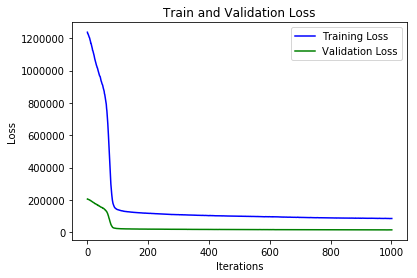

In [24]:
epochs = range(1, len(loss_list) + 1)

plt.plot(epochs, loss_list, "b", label="Training Loss", color="blue")
plt.plot(epochs, val_loss_list, "b", label="Validation Loss", color="green")

plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Train and Validation Loss")

plt.show()